In [3]:
from src.deep import data_loaders
from src.deep.data_loaders import SingleMuDataSet
from src.deep.metrics import Metrics
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm.notebook import tqdm

from src.optics.channel_simulation import ChannelSimulator
from src.general_methods.visualizer import Visualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/20 [00:00<?, ?it/s]

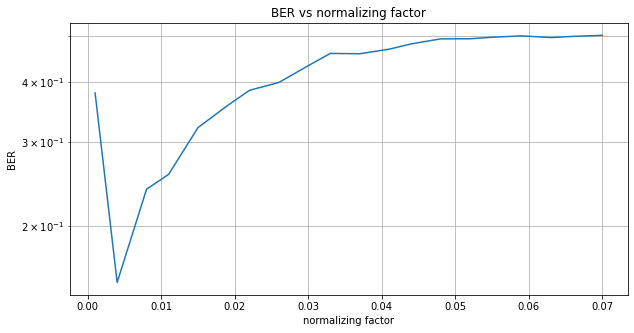

In [11]:
root_dir = f'../../data/datasets/qam1024_160x20'
sub_name_filter = '*'
ber_vec, mu_vec = Metrics.gen_ber_mu_from_folders(root_dir, sub_name_filter, 0, tqdm, 15)
Visualizer.plot_bers(mu_vec, [ber_vec])

the folder ../../data/datasets/qam1024_160x20/160_samples_mu=0.008 contains 160 samples


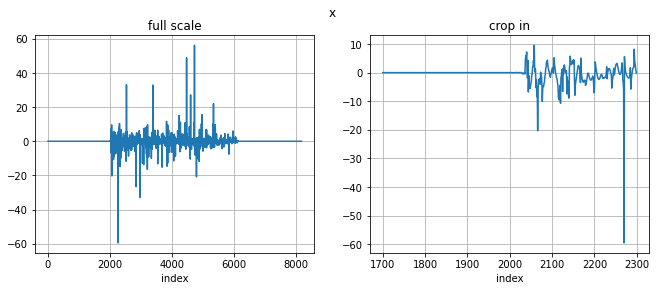

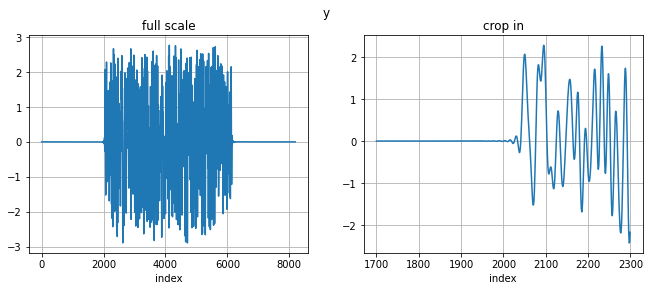

In [14]:
# read folder and plot one of the data samples
sub_name = '160_samples_mu=0.008'
dir = root_dir + '/' + sub_name
data_id = 0
zm = range(1700, 2300)

dataloader = SingleMuDataSet(dir)

print(f'the folder {dir} contains {len(dataloader)} samples')

x, y = dataloader.get_numpy_xy(data_id)

Visualizer.twin_zoom_plot('x', np.real(x), zm)
Visualizer.twin_zoom_plot('y', np.real(y), zm)

In [15]:
# calc signal power
x_power = np.mean(np.abs(x)**2)
print(np.mean(np.abs(x/np.sqrt(x_power))**2))


0.9999999999999996


In [16]:
# generate cs based on the config
conf = data_loaders.read_conf(dir)
cs = ChannelSimulator.from_dict(conf)
print(cs)
# plot ber vs mu

{
    "m_qam": 1024,
    "num_symbols": 512,
    "normalization_factor": 0.007815789473684212,
    "dt": 1,
    "ssf": {
        "b2": -2e-26,
        "gamma": 0.003,
        "t0": 1.25e-10,
        "dt": 1,
        "z_n": 1000000.0,
        "h": 200
    }
}


In [17]:
# calc ber for each sample
ber_vec, num_errors = Metrics.calc_ber_from_dataset(dataloader,True,tqdm)
print(f'the avg ber is {np.mean(ber_vec)}')

  0%|          | 0/160 [00:00<?, ?it/s]

data 0 has ber of: 0.2361328125 with 1209/5120 bit errors
data 1 has ber of: 0.2212890625 with 1133/5120 bit errors
data 2 has ber of: 0.2361328125 with 1209/5120 bit errors
data 3 has ber of: 0.2361328125 with 1209/5120 bit errors
data 4 has ber of: 0.2361328125 with 1209/5120 bit errors
data 5 has ber of: 0.2361328125 with 1209/5120 bit errors
data 6 has ber of: 0.2361328125 with 1209/5120 bit errors
data 7 has ber of: 0.2361328125 with 1209/5120 bit errors
data 8 has ber of: 0.2361328125 with 1209/5120 bit errors
data 9 has ber of: 0.2361328125 with 1209/5120 bit errors
data 10 has ber of: 0.2361328125 with 1209/5120 bit errors
data 11 has ber of: 0.2212890625 with 1133/5120 bit errors
data 12 has ber of: 0.2361328125 with 1209/5120 bit errors
data 13 has ber of: 0.2361328125 with 1209/5120 bit errors
data 14 has ber of: 0.2361328125 with 1209/5120 bit errors
data 15 has ber of: 0.2361328125 with 1209/5120 bit errors
data 16 has ber of: 0.2361328125 with 1209/5120 bit errors
data 17

In [ ]:
sub_name_filter